In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import skew 
plt.style.use('seaborn')

In [3]:
df = pd.read_stata('WoON2015small.dta')

C:\Users\jabor\AppData\Roaming\Python\Python38\site-packages\pandas\io\stata.py:1433: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [4]:
assignmentdata = df[['totener', 'gebruiksopp', 'AantalPP', 'huko', 'g4_5']]
assignmentdata.head(10)

,totener,gebruiksopp,AantalPP,huko,g4_5
0,132.86,100,1,Rental,Amsterdam
1,341.21,15,15,Rental,Utrecht
2,208.22,71,2,Rental,Utrecht
3,168.55,124,3,Owner-Occupied,Utrecht
4,84.67,108,1,Owner-Occupied,Utrecht
5,187.96,180,2,Owner-Occupied,Utrecht
6,56.75,98,1,Rental,Utrecht
7,NaN,328,5,NaN,Utrecht
8,135.43,119,3,Owner-Occupied,Utrecht
9,128.59,60,4,Rental,Utrecht


In [5]:
assignmentdata.dropna(inplace=True)


<ipython-input-5-f869f9fc690b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assignmentdata.dropna(inplace=True)


,totener,gebruiksopp,AantalPP
count,7092.000000,7092.000000,7092.000000
mean,121.676755,89.422589,2.013395
std,49.999576,46.468727,1.282742
min,16.700000,12.000000,1.000000
25%,86.475000,64.000000,1.000000
50%,112.570000,81.000000,2.000000
75%,149.120000,105.000000,3.000000
max,465.230000,1000.000000,24.000000


In [ ]:
datasummary=assignmentdata.describe()
datasummary

In [6]:
assignmentdata['huko'].value_counts(normalize=True)

Rental            0.635082
Owner-Occupied    0.364918
Name: huko, dtype: float64

In [7]:
assignmentdata['g4_5'].value_counts(normalize=True)

s-Gravenhage    0.268331
Amsterdam       0.266779
Utrecht         0.264523
Rotterdam       0.200367
Name: g4_5, dtype: float64

In [8]:
assignmentdata.describe()

,totener,gebruiksopp,AantalPP
count,7092.000000,7092.000000,7092.000000
mean,121.676755,89.422589,2.013395
std,49.999576,46.468727,1.282742
min,16.700000,12.000000,1.000000
25%,86.475000,64.000000,1.000000
50%,112.570000,81.000000,2.000000
75%,149.120000,105.000000,3.000000
max,465.230000,1000.000000,24.000000


In [29]:
regr = LinearRegression()
X1 = assignmentdata['gebruiksopp'].values.reshape(-1, 1)
X2 = assignmentdata['AantalPP'].values.reshape(-1,1)
Y = assignmentdata['totener'].values.reshape(-1,1)
regr.fit(X1, Y)
Y1_pred = regr.predict(X1)
X1_int = regr.intercept_
X1_coef = regr.coef_
regr.fit(X2, Y)
Y2_pred = regr.predict(X2)
X2_int = regr.intercept_
X2_coef = regr.coef_
Y1_tag = "Y = " + str(X1_int) + " + " + str(X1_coef) + "*X"
Y2_tag = "Y = " + str(X2_int) + " + " + str(X2_coef) + "*X"
print(Y1_tag)
print(Y2_tag)
print( skew(X1), skew(X2))

Y = [81.57815959] + [[0.44841685]]*X
Y = [91.81901559] + [[14.82954598]]*X
[4.51213866] [2.51804289]


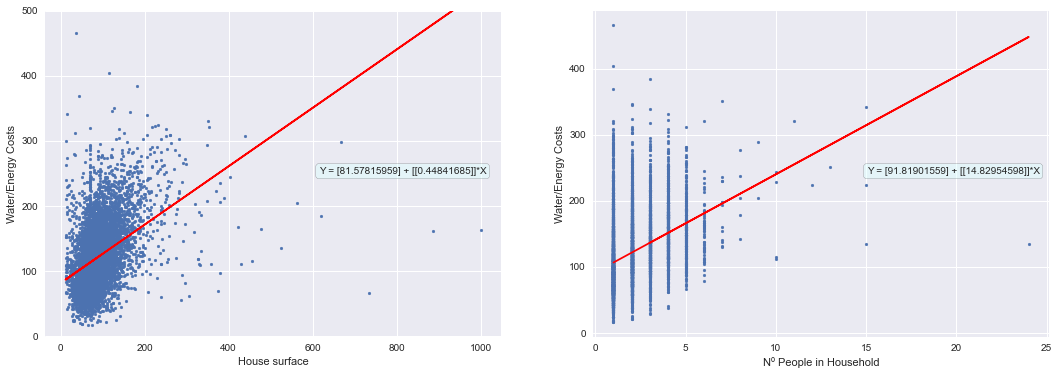

In [10]:
props = dict(boxstyle='round', facecolor='lightcyan', alpha=0.5)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
ax1. scatter(X1, Y, s=8)
ax1.plot(X1, Y1_pred, color='red')
ax1.set_xlabel("House surface")
ax1.set_ylabel("Water/Energy Costs")
ax1.set_ylim((-1,500))
ax1.text(0.60, 0.5, Y1_tag, transform=ax1.transAxes, fontsize=10, bbox=props)
ax2. scatter(X2, Y, s=8)
ax2.plot(X2, Y2_pred, color='red')
ax2.set_xlabel("Nº People in Household")
ax2.set_ylabel("Water/Energy Costs")
ax2.text(0.60, 0.5, Y2_tag, transform=ax2.transAxes, fontsize=10, bbox=props)
plt.show()

In [11]:
X = assignmentdata[['AantalPP', 'gebruiksopp']]
Y = assignmentdata['totener'].values.reshape(-1,1)
regr.fit(X, Y)
Y_pred = regr.predict(X)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [67.00712132]
Coefficients: 
 [[11.10920763  0.36123318]]


In [12]:
hukogroups = assignmentdata.groupby('huko')
regr = LinearRegression()
X1 = hukogroups.get_group('Rental')['gebruiksopp'].values.reshape(-1, 1)
X2 = hukogroups.get_group('Owner-Occupied')['gebruiksopp'].values.reshape(-1,1)
X3 = hukogroups.get_group('Rental')['AantalPP'].values.reshape(-1, 1)
X4 = hukogroups.get_group('Owner-Occupied')['AantalPP'].values.reshape(-1,1)
Y1 = hukogroups.get_group('Rental')['totener'].values.reshape(-1,1)
Y2 = hukogroups.get_group('Owner-Occupied')['totener'].values.reshape(-1,1)
regr.fit(X1, Y1)
Y1_pred = regr.predict(X1)
X1_int = regr.intercept_
X1_coef = regr.coef_
Y1_tag = "Y = " + str(X1_int) + " + " + str(X1_coef) + "*X"
print(Y1_tag)
regr.fit(X2, Y2)
Y2_pred = regr.predict(X2)
X2_int = regr.intercept_
X2_coef = regr.coef_
Y2_tag = "Y = " + str(X2_int) + " + " + str(X2_coef) + "*X"
print(Y2_tag)
regr.fit(X3, Y1)
Y3_pred = regr.predict(X3)
X3_int = regr.intercept_
X3_coef = regr.coef_
Y3_tag = "Y = " + str(X3_int) + " + " + str(X3_coef) + "*X"
print(Y3_tag)
regr.fit(X4, Y2)
Y4_pred = regr.predict(X4)
X4_int = regr.intercept_
X4_coef = regr.coef_
Y4_tag = "Y = " + str(X4_int) + " + " + str(X4_coef) + "*X"
print(Y4_tag)


Y = [87.60900783] + [[0.31667643]]*X
Y = [83.78483716] + [[0.49730461]]*X
Y = [91.06556684] + [[11.65499164]]*X
Y = [97.58949875] + [[17.28086312]]*X


Text(0.5, 1.0, 'Owner-Occupied')

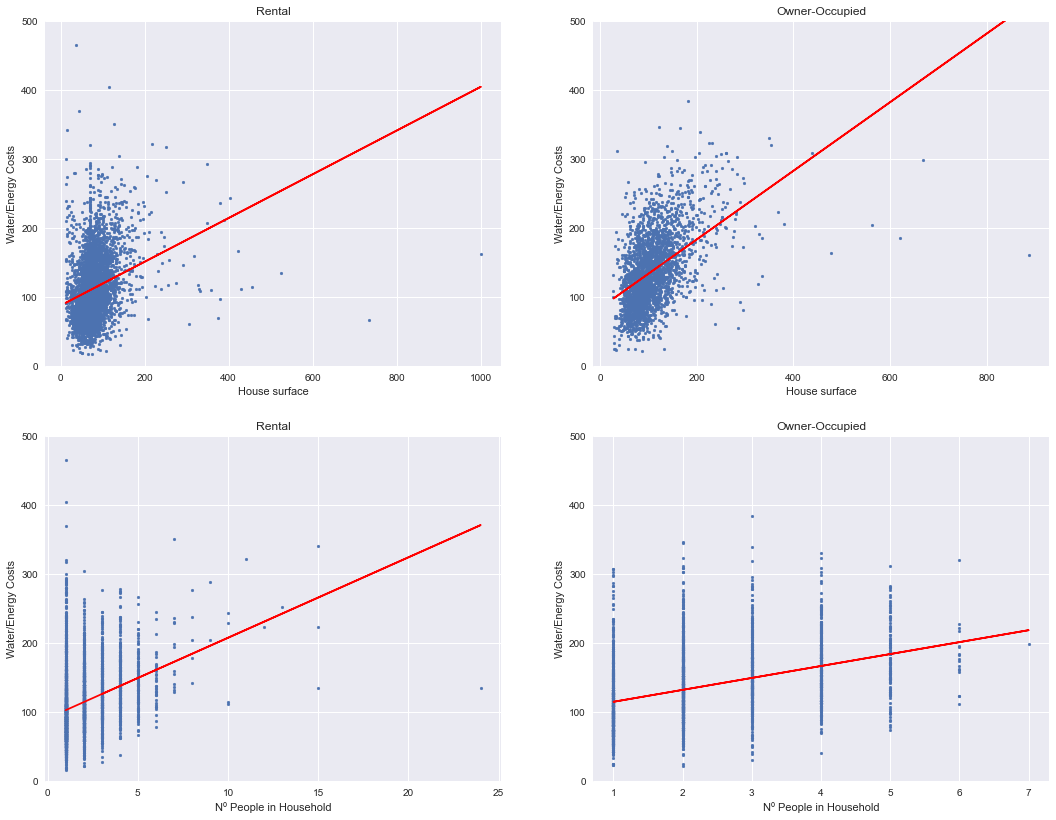

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(18,14))
ax1. scatter(X1, Y1, s=8)
ax1.plot(X1, Y1_pred, color='red')
ax1.set_xlabel("House surface")
ax1.set_ylabel("Water/Energy Costs")
ax1.set_ylim((-1,500))
ax1.set_title('Rental')
ax2. scatter(X2, Y2, s=8)
ax2.plot(X2, Y2_pred, color='red')
ax2.set_xlabel("House surface")
ax2.set_ylabel("Water/Energy Costs")
ax2.set_ylim((-1,500))
ax2.set_title('Owner-Occupied')
ax3. scatter(X3, Y1, s=8)
ax3.plot(X3, Y3_pred, color='red')
ax3.set_xlabel("Nº People in Household")
ax3.set_ylabel("Water/Energy Costs")
ax3.set_ylim((-1,500))
ax3.set_title('Rental')
ax4.scatter(X4, Y2, s=8)
ax4.plot(X4, Y4_pred, color='red')
ax4.set_xlabel("Nº People in Household")
ax4.set_ylabel("Water/Energy Costs")
ax4.set_ylim((-1,500))
ax4.set_title('Owner-Occupied')

In [14]:
hukogroups = assignmentdata.groupby('huko')
regr = LinearRegression()
X1 = hukogroups.get_group('Rental')[['gebruiksopp','AantalPP']]
X2 = hukogroups.get_group('Owner-Occupied')[['gebruiksopp','AantalPP']]
Y1 = hukogroups.get_group('Rental')['totener'].values.reshape(-1,1)
Y2 = hukogroups.get_group('Owner-Occupied')['totener'].values.reshape(-1,1)
regr.fit(X1, Y1)
Y1_pred = regr.predict(X1)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
regr.fit(X2, Y2)
Y2_pred = regr.predict(X2)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 [76.2085831]
Coefficients: 
 [[0.23271823 9.79555907]]
Intercept: 
 [60.84072748]
Coefficients: 
 [[ 0.42701641 13.16986649]]


In [15]:
citygroups = assignmentdata.groupby('g4_5')
X1 = citygroups.get_group('s-Gravenhage')['gebruiksopp'].values.reshape(-1, 1)
X2 = citygroups.get_group('Amsterdam')['gebruiksopp'].values.reshape(-1,1)
X3 = citygroups.get_group('Utrecht')['gebruiksopp'].values.reshape(-1, 1)
X4 = citygroups.get_group('Rotterdam')['gebruiksopp'].values.reshape(-1,1)
Y1 = citygroups.get_group('s-Gravenhage')['totener'].values.reshape(-1, 1)
Y2 = citygroups.get_group('Amsterdam')['totener'].values.reshape(-1,1)
Y3 = citygroups.get_group('Utrecht')['totener'].values.reshape(-1, 1)
Y4 = citygroups.get_group('Rotterdam')['totener'].values.reshape(-1,1)
regr.fit(X1, Y1)
Y1_pred = regr.predict(X1)
X1_int = regr.intercept_
X1_coef = regr.coef_
Y1_tag = "Y(TheHague) = " + str(X1_int) + " + " + str(X1_coef) + "*Xgebruiksopp"
print(Y1_tag)
regr.fit(X2, Y2)
Y2_pred = regr.predict(X2)
X2_int = regr.intercept_
X2_coef = regr.coef_
Y2_tag = "Y(Amsterdam) = " + str(X2_int) + " + " + str(X2_coef) + "*Xgebruiksopp"
print(Y2_tag)
regr.fit(X3, Y3)
Y3_pred = regr.predict(X3)
X3_int = regr.intercept_
X3_coef = regr.coef_
Y3_tag = "Y(Utrecht) = " + str(X3_int) + " + " + str(X3_coef) + "*Xgebruiksopp"
print(Y3_tag)
regr.fit(X4, Y4)
Y4_pred = regr.predict(X4)
X4_int = regr.intercept_
X4_coef = regr.coef_
Y4_tag = "Y(Rotterdam) = " + str(X4_int) + " + " + str(X4_coef) + "*Xgebruiksopp"
print(Y4_tag)

Y(TheHague) = [74.947182] + [[0.53339417]]*Xgebruiksopp
Y(Amsterdam) = [82.03394906] + [[0.40748065]]*Xgebruiksopp
Y(Utrecht) = [92.2978592] + [[0.37551953]]*Xgebruiksopp
Y(Rotterdam) = [77.52091778] + [[0.45895733]]*Xgebruiksopp


In [16]:
citygroups = assignmentdata.groupby('g4_5')
X1 = citygroups.get_group('s-Gravenhage')['AantalPP'].values.reshape(-1, 1)
X2 = citygroups.get_group('Amsterdam')['AantalPP'].values.reshape(-1,1)
X3 = citygroups.get_group('Utrecht')['AantalPP'].values.reshape(-1, 1)
X4 = citygroups.get_group('Rotterdam')['AantalPP'].values.reshape(-1,1)
Y1 = citygroups.get_group('s-Gravenhage')['totener'].values.reshape(-1, 1)
Y2 = citygroups.get_group('Amsterdam')['totener'].values.reshape(-1,1)
Y3 = citygroups.get_group('Utrecht')['totener'].values.reshape(-1, 1)
Y4 = citygroups.get_group('Rotterdam')['totener'].values.reshape(-1,1)
regr.fit(X1, Y1)
Y1_pred = regr.predict(X1)
X1_int = regr.intercept_
X1_coef = regr.coef_
Y1_tag = "Y(TheHague) = " + str(X1_int) + " + " + str(X1_coef) + "*XAantalPP"
print(Y1_tag)
regr.fit(X2, Y2)
Y2_pred = regr.predict(X2)
X2_int = regr.intercept_
X2_coef = regr.coef_
Y2_tag = "Y(Amsterdam) = " + str(X2_int) + " + " + str(X2_coef) + "*XAantalPP"
print(Y2_tag)
regr.fit(X3, Y3)
Y3_pred = regr.predict(X3)
X3_int = regr.intercept_
X3_coef = regr.coef_
Y3_tag = "Y(Utrecht) = " + str(X3_int) + " + " + str(X3_coef) + "*XAantalPP"
print(Y3_tag)
regr.fit(X4, Y4)
Y4_pred = regr.predict(X4)
X4_int = regr.intercept_
X4_coef = regr.coef_
Y4_tag = "Y(Rotterdam) = " + str(X4_int) + " + " + str(X4_coef) + "*XAantalPP"
print(Y4_tag)

Y(TheHague) = [89.56480212] + [[18.190661]]*XAantalPP
Y(Amsterdam) = [82.2666327] + [[16.40709106]]*XAantalPP
Y(Utrecht) = [103.78820942] + [[11.20129708]]*XAantalPP
Y(Rotterdam) = [86.48902144] + [[16.29360564]]*XAantalPP


In [18]:
DHhukogroups = citygroups.get_group('s-Gravenhage').groupby('huko')
Amshukogroups = citygroups.get_group('Amsterdam').groupby('huko')
Uthukogroups = citygroups.get_group('Utrecht').groupby('huko')
Rotthukogroups = citygroups.get_group('Rotterdam').groupby('huko')

X1 = DHhukogroups.get_group('Rental')[['gebruiksopp','AantalPP']]
X2 = DHhukogroups.get_group('Owner-Occupied')[['gebruiksopp','AantalPP']]
X3 = Amshukogroups.get_group('Rental')[['gebruiksopp','AantalPP']]
X4 = Amshukogroups.get_group('Owner-Occupied')[['gebruiksopp','AantalPP']]
X5 = Uthukogroups.get_group('Rental')[['gebruiksopp','AantalPP']]
X6 = Uthukogroups.get_group('Owner-Occupied')[['gebruiksopp','AantalPP']]
X7 = Rotthukogroups.get_group('Rental')[['gebruiksopp','AantalPP']]
X8 = Rotthukogroups.get_group('Owner-Occupied')[['gebruiksopp','AantalPP']]
Y1 = DHhukogroups.get_group('Rental')['totener'].values.reshape(-1,1)
Y2 = DHhukogroups.get_group('Owner-Occupied')['totener'].values.reshape(-1,1)
Y3 = Amshukogroups.get_group('Rental')['totener'].values.reshape(-1,1)
Y4 = Amshukogroups.get_group('Owner-Occupied')['totener'].values.reshape(-1,1)
Y5 = Uthukogroups.get_group('Rental')['totener'].values.reshape(-1,1)
Y6 = Uthukogroups.get_group('Owner-Occupied')['totener'].values.reshape(-1,1)
Y7 = Rotthukogroups.get_group('Rental')['totener'].values.reshape(-1,1)
Y8 = Rotthukogroups.get_group('Owner-Occupied')['totener'].values.reshape(-1,1)

regr.fit(X1, Y1)
regr.predict(X1)
print('DH_RENT_Intercept: \n', regr.intercept_)
print('DH_RENT_Coefficients: \n', regr.coef_)

regr.fit(X2, Y2)
regr.predict(X2)
print('DH_OWN_Intercept: \n', regr.intercept_)
print('DH_OWN_Coefficients: \n', regr.coef_)
             
regr.fit(X3, Y3)
regr.predict(X3)
print('Ams_RENT_Intercept: \n', regr.intercept_)
print('Ams_RENT_Coefficients: \n', regr.coef_)

regr.fit(X4, Y4)
regr.predict(X4)
print('Ams_OWN_Intercept: \n', regr.intercept_)
print('Ams_OWN_Coefficients: \n', regr.coef_)

regr.fit(X5, Y5)
regr.predict(X5)
print('UT_RENT_Intercept: \n', regr.intercept_)
print('UT_RENT_Coefficients: \n', regr.coef_)

regr.fit(X6, Y6)
regr.predict(X3)
print('UT_OWN_Intercept: \n', regr.intercept_)
print('UT_OWN_Coefficients: \n', regr.coef_)

regr.fit(X7, Y7)
regr.predict(X7)
print('ROTT_RENT_Intercept: \n', regr.intercept_)
print('ROTT_RENT_Coefficients: \n', regr.coef_)

regr.fit(X8, Y8)
regr.predict(X8)
print('ROTT_OWN_Intercept: \n', regr.intercept_)
print('ROTT_OWN_Coefficients: \n', regr.coef_)
             


DH_RENT_Intercept: 
 [67.03262925]
DH_RENT_Coefficients: 
 [[ 0.31736433 11.68827815]]
DH_OWN_Intercept: 
 [64.03312554]
DH_OWN_Coefficients: 
 [[ 0.46557309 12.66061456]]
Ams_RENT_Intercept: 
 [72.10806104]
Ams_RENT_Coefficients: 
 [[ 0.19947923 11.85916654]]
Ams_OWN_Intercept: 
 [45.80210487]
Ams_OWN_Coefficients: 
 [[ 0.48223842 16.67720514]]
UT_RENT_Intercept: 
 [85.90174128]
UT_RENT_Coefficients: 
 [[0.24485116 6.516681  ]]
UT_OWN_Intercept: 
 [75.98186475]
UT_OWN_Coefficients: 
 [[ 0.29286379 12.93663459]]
ROTT_RENT_Intercept: 
 [78.13440523]
ROTT_RENT_Coefficients: 
 [[ 0.08959281 13.62738486]]
ROTT_OWN_Intercept: 
 [53.17395332]
ROTT_OWN_Coefficients: 
 [[ 0.51693387 10.67206761]]


In [24]:
pd.set_option("display.max_columns", 50)
DHhukogroups.describe()

totener                                                   \
                 count        mean        std    min       25%      50%   
huko                                                                      
Owner-Occupied   619.0  148.378666  54.124226  24.96  110.6000  138.860   
Rental          1284.0  113.374952  43.914962  19.79   83.2075  107.045   

                               gebruiksopp                                     \
                   75%     max       count        mean        std   min   25%   
huko                                                                            
Owner-Occupied  178.41  384.29       619.0  118.738288  57.585417  34.0  80.0   
Rental          136.75  304.63      1284.0   81.169782  36.565863  15.0  61.0   

                                     AantalPP                                \
                  50%     75%    max    count      mean       std  min  25%   
huko                                                                          
Owner-Occupied  103.0  140.50  563.0    619.0  2.295638  1.196609  1.0  1.0   
Rental           74.0   94.25  380.0   1284.0  1.760903  1.062210  1.0  1.0   

                               
                50%  75%  max  
huko                           
Owner-Occupied  2.0  3.0  7.0  
Rental          1.0  2.0  9.0

In [25]:
Amshukogroups.describe()

totener                                                       \
                 count        mean        std    min    25%     50%     75%   
huko                                                                          
Owner-Occupied   631.0  126.003545  53.389422  22.94  87.56  115.14  155.46   
Rental          1261.0  107.351175  43.535974  16.70  76.98   99.83  128.75   

                       gebruiksopp                                          \
                   max       count       mean        std   min   25%   50%   
huko                                                                         
Owner-Occupied  346.33       631.0  92.870048  47.718442  28.0  62.0  85.0   
Rental          465.23      1261.0  69.655036  40.070740  15.0  51.0  64.0   

                              AantalPP                                     \
                  75%     max    count      mean       std  min  25%  50%   
huko                                                                        
Owner-Occupied  110.0   667.0    631.0  2.123613  1.150816  1.0  1.0  2.0   
Rental           80.0  1000.0   1261.0  1.800159  1.114707  1.0  1.0  1.0   

                           
                75%   max  
huko                       
Owner-Occupied  3.0   6.0  
Rental          2.0  10.0

In [26]:
Uthukogroups.describe()

totener                                                 \
                 count        mean        std    min      25%     50%   
huko                                                                    
Owner-Occupied   791.0  140.415647  50.859312  24.91  102.315  135.43   
Rental          1085.0  119.289223  52.028172  31.55   82.390  107.78   

                                gebruiksopp                               \
                    75%     max       count        mean        std   min   
huko                                                                       
Owner-Occupied  171.665  320.51       791.0  112.400759  53.410447  28.0   
Rental          145.910  350.27      1085.0   83.349309  44.038798  12.0   

                                          AantalPP                           \
                 25%    50%    75%    max    count      mean       std  min   
huko                                                                          
Owner-Occupied  83.5  106.0  127.0  886.0    791.0  2.436157  1.263172  1.0   
Rental          64.0   79.0   95.0  525.0   1085.0  1.991705  1.747145  1.0   

                                     
                25%  50%  75%   max  
huko                                 
Owner-Occupied  1.0  2.0  3.0   6.0  
Rental          1.0  1.0  2.0  24.0

In [27]:
Rotthukogroups.describe()

totener                                                \
                 count        mean        std    min     25%     50%   
huko                                                                   
Owner-Occupied   547.0  135.150053  49.675513  21.80  99.915  129.87   
Rental           874.0  110.078928  43.239497  16.97  78.795  103.54   

                                 gebruiksopp                               \
                     75%     max       count        mean        std   min   
huko                                                                        
Owner-Occupied  162.2600  318.09       547.0  108.837294  40.927089  45.0   
Rental          133.5175  369.45       874.0   81.408467  33.492356  15.0   

                                           AantalPP                           \
                  25%    50%    75%    max    count      mean       std  min   
huko                                                                           
Owner-Occupied  79.00  102.0  130.0  295.0    547.0  2.409506  1.207630  1.0   
Rental          65.25   78.0   92.0  734.0    874.0  1.808924  1.127136  1.0   

                                    
                25%  50%  75%  max  
huko                                
Owner-Occupied  1.0  2.0  3.0  6.0  
Rental          1.0  1.0  2.0  8.0